

## To Predict the Accident Severity.
Accidents are one of the leading causes of death worldwide. Due to the increase in population and motorization, the number of accidents worldwide has been increasing. Better prediction of the severity of accidents is essential to improve the safety performance of road traffic systems and reduce such unfortunate accidents.

**For this we are using accident data from uk goverment website "https://www.gov.uk/government/statistical-data-sets/reported-road-accidents-vehicles-and-casualties-tables-for-great-britain"**
**"Road Saftey data-accident 2019.csv"**


In [314]:
#Imports
import pandas as pd
import numpy as np

In [315]:
#Loading The Data 
df = pd.read_csv('Accidents_2019.csv', 

                usecols=['Accident_Severity','Number_of_Casualties','Light_Conditions',\
                         'Date','Time','Day_of_Week','Weather_Conditions','Local_Authority_(District)',\
                         'Urban_or_Rural_Area','Road_Surface_Conditions'],       

                dtype={"Accident_Index":np.unicode_})
df.head(4)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,3,3,18/02/19,2,17:50,1,1,1,1,1
1,3,1,15/01/19,3,21:45,9,4,1,1,1
2,3,1,01/01/19,3,1:50,2,4,1,1,1
3,2,1,01/01/19,3,1:20,2,4,1,1,1


In [316]:
#Doing Random Sampling of data as our dataset is too big and it will be difficult to run it in modelling phase
df1=df.sample(frac =.25,random_state=2)

In [317]:
#Displaying the results
df1.shape

(29384, 10)

In [318]:
#variable type checking
df1.dtypes

Accident_Severity              int64
Number_of_Casualties           int64
Date                          object
Day_of_Week                    int64
Time                          object
Local_Authority_(District)     int64
Light_Conditions               int64
Weather_Conditions             int64
Road_Surface_Conditions        int64
Urban_or_Rural_Area            int64
dtype: object

In [319]:
#Checking the null values
df1.isnull().sum()

Accident_Severity              0
Number_of_Casualties           0
Date                           0
Day_of_Week                    0
Time                          14
Local_Authority_(District)     0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions        0
Urban_or_Rural_Area            0
dtype: int64

# 1. Processing the datasets
### 1.1 Putting the districts name in the dataset

In [320]:
# Reading the dictionary which contain districts name
repl_dict = pd.read_excel("variable lookup.xls",
                          sheet_name="Local Authority (District)", index_col="code").to_dict()["label"]

# putting "Local_Authority_(District)" actual names
df1["Local_Authority_(District)"] = df1["Local_Authority_(District)"].map(repl_dict)

In [321]:
#Displaying the results
df1.head(2)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
89627,2,2,11/02/19,2,19:15,Dover,6,1,1,2
116992,3,1,02/04/19,3,15:00,North Lanarkshire,1,3,3,2


In [322]:
#displaying number of unique names of Local_Authority_(District)
df1["Local_Authority_(District)"].value_counts().count()

380

## 1.2 Converting the columns of dataset  to correct data types.
### 1.Converting Column 'Date'.

In [324]:
df1['Date'] = pd.to_datetime(df1['Date'], format="%d/%m/%y")
df1.head(2)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
89627,2,2,2019-02-11,2,19:15,Dover,6,1,1,2
116992,3,1,2019-04-02,3,15:00,North Lanarkshire,1,3,3,2


 ### 2.Changing Accident_Severity to categorical
 
 1: "Fatal"

2: "Serious"

3: "Slight"

In [325]:
# Replacing the accident severity.
replacement_dict = {
    1: "Fatal",
    2: "Serious",
    3: "Slight",
}
df1['Accident_Severity'] = df1['Accident_Severity'].map(replacement_dict)

In [326]:
#Displaying the results
df1.head(4)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
89627,Serious,2,2019-02-11,2,19:15,Dover,6,1,1,2
116992,Slight,1,2019-04-02,3,15:00,North Lanarkshire,1,3,3,2
23817,Slight,1,2019-12-10,3,9:20,Ealing,1,7,2,1
80223,Slight,1,2019-05-05,1,10:46,Cherwell,1,1,1,2


### 3.changing days of the week to string

In [327]:
# Changing days to their actual names from (Monday to Sunday)
replacement_dict2 = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}
df1['Day_of_Week'] = df1['Day_of_Week'].map(replacement_dict2)
df1.head(2)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
89627,Serious,2,2019-02-11,Monday,19:15,Dover,6,1,1,2
116992,Slight,1,2019-04-02,Tuesday,15:00,North Lanarkshire,1,3,3,2


 ### 4.Changing Light Conditions

In [328]:
# Changing light conditions to their actual names.
replacement_dict3 = {
    1: "Daylight",
    4: "Darkness with lights lit",
    5: "Darkness with lights unlit",
    6: "Darkness with no lighting",
    7: "Darkness with lighting unknown",
   -1: "Data missing or out of range"
}
df1['Light_Conditions'] = df1['Light_Conditions'].map(replacement_dict3)
df1.head(2) #displaying the results.

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
89627,Serious,2,2019-02-11,Monday,19:15,Dover,Darkness with no lighting,1,1,2
116992,Slight,1,2019-04-02,Tuesday,15:00,North Lanarkshire,Daylight,3,3,2


### 5. Changing Weather Conditions to categorical.

In [329]:
# Changing weather condition to their actual values.
replacement_dict5 = {
    1: "Fine no high winds",
    2: "Raining no high winds",
    3: "Snowing no high winds",
    4: "Fine with high winds",
    5: "Raining with high winds",
    6: "Snowing with high winds",
    7: "Fog or mist",
    8: "Other",
    9: "Unknown",
    -1: "Data missing or out of range"
}
df1['Weather_Conditions'] = df1['Weather_Conditions'].map(replacement_dict5)
df1.head(4)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
89627,Serious,2,2019-02-11,Monday,19:15,Dover,Darkness with no lighting,Fine no high winds,1,2
116992,Slight,1,2019-04-02,Tuesday,15:00,North Lanarkshire,Daylight,Snowing no high winds,3,2
23817,Slight,1,2019-12-10,Tuesday,9:20,Ealing,Daylight,Fog or mist,2,1
80223,Slight,1,2019-05-05,Sunday,10:46,Cherwell,Daylight,Fine no high winds,1,2


### 6. Changing Urban and Rural to Categorical.


In [330]:
# Changing Urban and Rural to their actual values.
replacement_dict7 = {
    1: "Urban",
    2: "Rural",
    -1: "Unallocated"
}
df1['Urban_or_Rural_Area'] = df1['Urban_or_Rural_Area'].map(replacement_dict7)
df1.head(4)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
89627,Serious,2,2019-02-11,Monday,19:15,Dover,Darkness with no lighting,Fine no high winds,1,Rural
116992,Slight,1,2019-04-02,Tuesday,15:00,North Lanarkshire,Daylight,Snowing no high winds,3,Rural
23817,Slight,1,2019-12-10,Tuesday,9:20,Ealing,Daylight,Fog or mist,2,Urban
80223,Slight,1,2019-05-05,Sunday,10:46,Cherwell,Daylight,Fine no high winds,1,Rural


In [331]:
#Replacing "Unknown" and "Data missing or out of range" with NaN, so later on we can deal with missing values.
df1['Urban_or_Rural_Area'] = df1['Urban_or_Rural_Area'].replace("Unallocated", np.NaN)
df1['Urban_or_Rural_Area'] = df1['Urban_or_Rural_Area'].replace("", np.NaN)
df1.head(3)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
89627,Serious,2,2019-02-11,Monday,19:15,Dover,Darkness with no lighting,Fine no high winds,1,Rural
116992,Slight,1,2019-04-02,Tuesday,15:00,North Lanarkshire,Daylight,Snowing no high winds,3,Rural
23817,Slight,1,2019-12-10,Tuesday,9:20,Ealing,Daylight,Fog or mist,2,Urban


### 7.Changing Road surface condition to Nominal Fileds

In [332]:
# Replacing road surface condition to their actual fileds.
replacement_dict8 = {
    1: "Dry",
    2: "Wet",
    3: "Snow",
    4: "Frost",
    5: "Flood",
    -1: "Data missing or out of range"
}
df1['Road_Surface_Conditions'] = df1['Road_Surface_Conditions'].map(replacement_dict8)
df1.head(4)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
89627,Serious,2,2019-02-11,Monday,19:15,Dover,Darkness with no lighting,Fine no high winds,Dry,Rural
116992,Slight,1,2019-04-02,Tuesday,15:00,North Lanarkshire,Daylight,Snowing no high winds,Snow,Rural
23817,Slight,1,2019-12-10,Tuesday,9:20,Ealing,Daylight,Fog or mist,Wet,Urban
80223,Slight,1,2019-05-05,Sunday,10:46,Cherwell,Daylight,Fine no high winds,Dry,Rural


In [333]:
df1.shape

(29384, 10)

In [334]:
#Displaying the null values
df1.isna().sum()

Accident_Severity              0
Number_of_Casualties           0
Date                           0
Day_of_Week                    0
Time                          14
Local_Authority_(District)     0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions        0
Urban_or_Rural_Area           10
dtype: int64

#### As we can see above there are null values in variable time we cant predict or impute time so we will discard time.

In [335]:
#Dropping null values in column Time
df2 = df1.dropna(subset=["Time"])

In [336]:
df2.shape

(29370, 10)

In [337]:
#Now we will deal with missing values in "urban_or_Rural_Area" variable.
df2.isna().sum()

Accident_Severity              0
Number_of_Casualties           0
Date                           0
Day_of_Week                    0
Time                           0
Local_Authority_(District)     0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions        0
Urban_or_Rural_Area           10
dtype: int64

#### Now we can see Null values for time are not there

In [338]:
#Calculating mean of missing value in "urban_or_Rural_Area" variable.
df2["Urban_or_Rural_Area"].isnull().mean()

0.00034048348655090226

<AxesSubplot:>

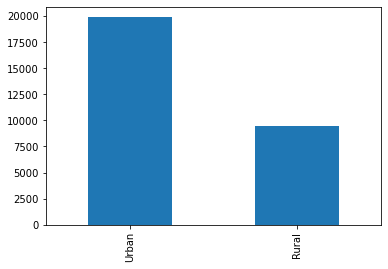

In [339]:
#Plotting graph for "urban_or_Rural_Area" variable.
df2["Urban_or_Rural_Area"].value_counts().plot.bar()

In [340]:
#Calculating mode of "urban_or_Rural_Area" variable.
df2["Urban_or_Rural_Area"].mode()

0    Urban
dtype: object

In [341]:
#Filling missing values with mode in "urban_or_Rural_Area" variable.
df2["Urban_or_Rural_Area"].fillna("Urban",inplace=True)

/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [342]:
#Now there is no null values in any of the variables.
df2.isna().sum()

Accident_Severity             0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          0
Local_Authority_(District)    0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Urban_or_Rural_Area           0
dtype: int64

# Train Test Split
#### For Train test and split we will use stratified sampling 


In [343]:
df2.reset_index(inplace=True)

In [344]:
#From sklearn.model_selection importing stratifiedShuffleSplit.
from sklearn.model_selection import StratifiedShuffleSplit

stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=7)

train_index, test_index = list(stratified_splitter.split(df2, df2["Accident_Severity"]))[0]
strat_train_set = df2.loc[train_index]
strat_test_set = df2.loc[test_index]
print(f"{strat_train_set.shape[0]} train and {strat_test_set.shape[0]} test instances")

22027 train and 7343 test instances


**Results of stratified sampling**
- Trainset: 22027(75%)
- Testset: 7343(25%)

In [345]:
#Rename the dataset to train_data and test_data respectively.
train_data = strat_train_set
test_data = strat_test_set

In [346]:
#Displying Results of train data
train_data.head(2)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine no high winds,Dry,Urban
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining no high winds,Wet,Urban


In [347]:
#Displaying results of test data
test_data.head(2)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine no high winds,Wet,Rural
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine no high winds,Dry,Urban


## Feature Engineering on train_data.
### 1. Creating a new column called "Month" by using library (import datetime),And setting the month from (1 to 12).

In [348]:
#importing date time library
import datetime
train_data["Month"]=pd.DatetimeIndex(train_data["Date"]).month
train_data.head()

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine no high winds,Dry,Urban,9
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining no high winds,Wet,Urban,5
8116,26324,Slight,1,2019-02-02,Saturday,12:30,South Ribble,Daylight,Fine no high winds,Dry,Rural,2
21270,79443,Slight,1,2019-01-28,Monday,20:22,West Berkshire,Darkness with no lighting,Fine no high winds,Dry,Rural,1
20230,34126,Serious,1,2019-03-24,Sunday,12:59,Rochdale,Daylight,Fine no high winds,Dry,Rural,3


### 2. Changing month to actual months by making a dictionary of months names.


In [349]:
# Changing month to actual months by making a dictionary of months names.
replacement_dict0 = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}
train_data['Month'] = train_data['Month'].map(replacement_dict0)
train_data.head(4)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine no high winds,Dry,Urban,September
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining no high winds,Wet,Urban,May
8116,26324,Slight,1,2019-02-02,Saturday,12:30,South Ribble,Daylight,Fine no high winds,Dry,Rural,February
21270,79443,Slight,1,2019-01-28,Monday,20:22,West Berkshire,Darkness with no lighting,Fine no high winds,Dry,Rural,January


### 3.Creating a column called 'VISIBILITY' In which if their is 'Daylight' or 'Night' with lights ON then it returns True, Otherwise False.


In [350]:
def func(row):
    
    if row["Light_Conditions"]=="Daylight" or row["Light_Conditions"] == "Darkness with lights lit":
        return True
    else:
        return False
train_data["VISIBILITY"] = train_data.apply(func,axis=1)
train_data.head(2) #displaying the results.

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine no high winds,Dry,Urban,September,True
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining no high winds,Wet,Urban,May,True


In [351]:
#Replacing "Unknown" and "Data missing or out of range" with NaN, so later on we can deal with missing values.
train_data['Light_Conditions'] = train_data['Light_Conditions'].replace("Unknown", np.NaN)
train_data['Light_Conditions'] = train_data['Light_Conditions'].replace("Data missing or out of range", np.NaN)
train_data['Light_Conditions'] = train_data['Light_Conditions'].replace("Darkness with lighting unknown", np.NaN)
train_data['Light_Conditions'] = train_data['Light_Conditions'].replace("", np.NaN)
train_data['Light_Conditions'] = train_data['Light_Conditions'].replace("nan", np.NaN)
train_data.head(4)# Inspecting the results.

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine no high winds,Dry,Urban,September,True
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining no high winds,Wet,Urban,May,True
8116,26324,Slight,1,2019-02-02,Saturday,12:30,South Ribble,Daylight,Fine no high winds,Dry,Rural,February,True
21270,79443,Slight,1,2019-01-28,Monday,20:22,West Berkshire,Darkness with no lighting,Fine no high winds,Dry,Rural,January,False


In [352]:
#Now replacing boolean in "VISIBILITY" column to their actual value.
replacement_dict4 = {
    True: "Visible",
    False: "Not Visible"
}
train_data['VISIBILITY'] = train_data['VISIBILITY'].map(replacement_dict4)
train_data.head(4)#Displaying the results

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine no high winds,Dry,Urban,September,Visible
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining no high winds,Wet,Urban,May,Visible
8116,26324,Slight,1,2019-02-02,Saturday,12:30,South Ribble,Daylight,Fine no high winds,Dry,Rural,February,Visible
21270,79443,Slight,1,2019-01-28,Monday,20:22,West Berkshire,Darkness with no lighting,Fine no high winds,Dry,Rural,January,Not Visible


### 4. Creating a column called High_winds from weather conditions.



In [353]:
# Creating a column called High_winds from weather conditions.
def high(row):
    """Return True is high winds, False otherwise
    """
    if row["Weather_Conditions"]=="Raining with high winds" or \
    row["Weather_Conditions"] == "Fine with high winds" or row["Weather_Conditions"] == "Snowing with high winds":
        return True
    else:
        return False
train_data["High_winds"] = train_data.apply(high,axis=1)

In [354]:
# Removing "high winds" from Weather_Conditions.
train_data["Weather_Conditions"] = train_data["Weather_Conditions"].str.replace(" no high winds", "")
train_data["Weather_Conditions"] = train_data["Weather_Conditions"].str.replace(" with high winds", "")

# rename Weather_Conditions to "precipitation"
train_data = train_data.rename(columns={"Weather_Conditions": "Precipitation"})

train_data.head(5)#Displaying the results

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine,Dry,Urban,September,Visible,False
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining,Wet,Urban,May,Visible,False
8116,26324,Slight,1,2019-02-02,Saturday,12:30,South Ribble,Daylight,Fine,Dry,Rural,February,Visible,False
21270,79443,Slight,1,2019-01-28,Monday,20:22,West Berkshire,Darkness with no lighting,Fine,Dry,Rural,January,Not Visible,False
20230,34126,Serious,1,2019-03-24,Sunday,12:59,Rochdale,Daylight,Fine,Dry,Rural,March,Visible,False


In [355]:
# Replacing "Unknown" and "Data missing or out of range" with NaN, so later on we can deal with missing values.
train_data['Precipitation'] = train_data['Precipitation'].replace("Unknown", np.NaN)
train_data['Precipitation'] = train_data['Precipitation'].replace("Data missing or out of range", np.NaN)
train_data['Precipitation'] = train_data['Precipitation'].replace("", np.NaN)
train_data['Precipitation'] = train_data['Precipitation'].replace("nan", np.NaN)
train_data.head(4)#Displaying the results

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine,Dry,Urban,September,Visible,False
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining,Wet,Urban,May,Visible,False
8116,26324,Slight,1,2019-02-02,Saturday,12:30,South Ribble,Daylight,Fine,Dry,Rural,February,Visible,False
21270,79443,Slight,1,2019-01-28,Monday,20:22,West Berkshire,Darkness with no lighting,Fine,Dry,Rural,January,Not Visible,False


In [356]:
#Now replacing boolean in "High_winds" column to their actual value.
replacement_dict6 = {
    True: "High Winds",
    False: "No High Winds"
}
train_data['High_winds'] = train_data['High_winds'].map(replacement_dict6)
train_data.head(4)#Displaying the results

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine,Dry,Urban,September,Visible,No High Winds
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining,Wet,Urban,May,Visible,No High Winds
8116,26324,Slight,1,2019-02-02,Saturday,12:30,South Ribble,Daylight,Fine,Dry,Rural,February,Visible,No High Winds
21270,79443,Slight,1,2019-01-28,Monday,20:22,West Berkshire,Darkness with no lighting,Fine,Dry,Rural,January,Not Visible,No High Winds


### 5. Creating a new column "Road_surface_dry_or_wet" if road surface is dry it will show true and if wet, snow, frost and flood it will show false.

In [357]:
# Creating a new column "Road_surface" if road surface is dry it will show true and if wet, snow, frost and flood 
#it will show false.
def func(row): 
    
    if row["Road_Surface_Conditions"]=="Dry":
        return True
    else:
        return False
train_data["Road_Surface_dry_or_wet"] = train_data.apply(func,axis=1)


train_data.head(2) #Display Results

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine,Dry,Urban,September,Visible,No High Winds,True
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining,Wet,Urban,May,Visible,No High Winds,False


In [358]:
#Replacing "Unknown" and "Data missing or out of range" with NaN, so later on we can deal with missing values.
train_data['Road_Surface_Conditions'] = train_data['Road_Surface_Conditions'].replace("Unknown", np.NaN)
train_data['Road_Surface_Conditions'] = train_data['Road_Surface_Conditions'].replace("Data missing or out of range", np.NaN)
train_data['Road_Surface_Conditions'] = train_data['Road_Surface_Conditions'].replace("", np.NaN)
train_data['Road_Surface_Conditions'] = train_data['Road_Surface_Conditions'].replace("nan", np.NaN)
train_data.head(4)#Displaying results

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine,Dry,Urban,September,Visible,No High Winds,True
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining,Wet,Urban,May,Visible,No High Winds,False
8116,26324,Slight,1,2019-02-02,Saturday,12:30,South Ribble,Daylight,Fine,Dry,Rural,February,Visible,No High Winds,True
21270,79443,Slight,1,2019-01-28,Monday,20:22,West Berkshire,Darkness with no lighting,Fine,Dry,Rural,January,Not Visible,No High Winds,True


In [359]:
#Changing the boolean true or false to original value of road condition(wet or dry)
replacement_dict9 = {
    True: "Dry",
    False: "Wet"
}
train_data['Road_Surface_dry_or_wet'] = train_data['Road_Surface_dry_or_wet'].map(replacement_dict9)
train_data.head(4)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
418,56248,Slight,1,2019-09-14,Saturday,16:31,Newcastle-under-Lyme,Daylight,Fine,Dry,Urban,September,Visible,No High Winds,Dry
1347,66090,Slight,2,2019-05-02,Thursday,23:27,Leicester,Darkness with lights lit,Raining,Wet,Urban,May,Visible,No High Winds,Wet
8116,26324,Slight,1,2019-02-02,Saturday,12:30,South Ribble,Daylight,Fine,Dry,Rural,February,Visible,No High Winds,Dry
21270,79443,Slight,1,2019-01-28,Monday,20:22,West Berkshire,Darkness with no lighting,Fine,Dry,Rural,January,Not Visible,No High Winds,Dry


### 6.Converting Time in data set to day and night (in our dataset time is given in hours, so hour bigger then 7 and smaller then 20 will be day else night.

In [360]:
def time(row):
    df = []
    if(type(row) == float):
        row = str(row)
        df=row.split(".")
        
    else:
        df = str(row).split(":");
        
        hr = df[0]
        if int(hr) > 7 and int(hr) < 20:
            return "Day";
        else:
            return "Night";

In [361]:
# Applying Time and Day and Night on dataframe.
train_data["Time"] = train_data['Time'].apply(time) 

In [362]:
#Displaying the results
train_data.head(4)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
418,56248,Slight,1,2019-09-14,Saturday,Day,Newcastle-under-Lyme,Daylight,Fine,Dry,Urban,September,Visible,No High Winds,Dry
1347,66090,Slight,2,2019-05-02,Thursday,Night,Leicester,Darkness with lights lit,Raining,Wet,Urban,May,Visible,No High Winds,Wet
8116,26324,Slight,1,2019-02-02,Saturday,Day,South Ribble,Daylight,Fine,Dry,Rural,February,Visible,No High Winds,Dry
21270,79443,Slight,1,2019-01-28,Monday,Night,West Berkshire,Darkness with no lighting,Fine,Dry,Rural,January,Not Visible,No High Winds,Dry


In [363]:
#Checking all the unique values in each column.
column_name = ("Accident_Severity","Number_of_Casualties","Day_of_Week","Light_Conditions","Precipitation",\
              "Road_Surface_Conditions","Urban_or_Rural_Area","Month","VISIBILITY","High_winds","Road_Surface_dry_or_wet")
for col in column_name:
    print(train_data[col].unique())

['Slight' 'Serious' 'Fatal']
[ 1  2  3  4  5  6 12 11  7  8  9 13 10]
['Saturday' 'Thursday' 'Monday' 'Sunday' 'Friday' 'Wednesday' 'Tuesday']
['Daylight' 'Darkness with lights lit' 'Darkness with no lighting' nan
 'Darkness with lights unlit']
['Fine' 'Raining' nan 'Other' 'Fog or mist' 'Snowing']
['Dry' 'Wet' nan 'Frost' 'Snow' 'Flood']
['Urban' 'Rural']
['September' 'May' 'February' 'January' 'March' 'April' 'November'
 'December' 'October' 'August' 'June' 'July']
['Visible' 'Not Visible']
['No High Winds' 'High Winds']
['Dry' 'Wet']


In [364]:
# Checking null values in all the columns.
train_data.isna().sum()

index                           0
Accident_Severity               0
Number_of_Casualties            0
Date                            0
Day_of_Week                     0
Time                            0
Local_Authority_(District)      0
Light_Conditions              514
Precipitation                 650
Road_Surface_Conditions       256
Urban_or_Rural_Area             0
Month                           0
VISIBILITY                      0
High_winds                      0
Road_Surface_dry_or_wet         0
dtype: int64

#### Now we can see there are null values in 3 columns "Light_Conditions","Precipitation","Road_Surface_Conditions" further we will try to impute these with mode (most occuring value in these columns) as these are categorical columns.

In [365]:
#Finding mode of Light conditions
train_data["Light_Conditions"].mode()

0    Daylight
dtype: object

In [366]:
#Filling missing value with mode. 
train_data["Light_Conditions"].fillna("Daylight",inplace=True)

In [367]:
#Finding mode of Precipitation.
train_data["Precipitation"].mode()

0    Fine
dtype: object

In [368]:
#Filling missing value with mode. 
train_data["Precipitation"].fillna("Fine",inplace=True)

In [369]:
##Finding mode of Road_Surface_Conditions .
train_data["Road_Surface_Conditions"].mode()

0    Dry
dtype: object

In [370]:
#Filling missing value with mode. 
train_data["Road_Surface_Conditions"].fillna("Dry",inplace=True)

In [371]:
train_data.isna().sum()

index                         0
Accident_Severity             0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          0
Local_Authority_(District)    0
Light_Conditions              0
Precipitation                 0
Road_Surface_Conditions       0
Urban_or_Rural_Area           0
Month                         0
VISIBILITY                    0
High_winds                    0
Road_Surface_dry_or_wet       0
dtype: int64

#### Now we can see there is no missing value in our train_data set.

## Feature Engineering on test_data.
### 1. Creating a new column called "Month" by using library (import datetime),And setting the month from (1 to 12).

In [372]:
#Importing datetime library
import datetime
test_data["Month"]=pd.DatetimeIndex(test_data["Date"]).month
test_data.head()

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine no high winds,Wet,Rural,11
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine no high winds,Dry,Urban,4
2219,84520,Serious,1,2019-07-15,Monday,11:45,East Hampshire,Daylight,Fine no high winds,Dry,Rural,7
7854,97296,Fatal,1,2019-05-12,Sunday,6:43,Brighton and Hove,Daylight,Fine no high winds,Dry,Rural,5
19221,65077,Slight,1,2019-09-13,Friday,19:39,North Kesteven,Darkness with lights lit,Fine no high winds,Dry,Rural,9


### 2. Changing month to actual months by making a dictionary of months names.

In [373]:
# Changing month to actual months by making a dictionary of months names.
replacement_dict0 = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}
test_data['Month'] = test_data['Month'].map(replacement_dict0)
test_data.head(4)#Displaying the results

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine no high winds,Wet,Rural,November
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine no high winds,Dry,Urban,April
2219,84520,Serious,1,2019-07-15,Monday,11:45,East Hampshire,Daylight,Fine no high winds,Dry,Rural,July
7854,97296,Fatal,1,2019-05-12,Sunday,6:43,Brighton and Hove,Daylight,Fine no high winds,Dry,Rural,May


### 3.Creating a column called 'VISIBILITY' In which if their is 'Daylight' or 'Night' with lights ON then it returns True, Otherwise False.

In [374]:
def func(row):
    
    if row["Light_Conditions"]=="Daylight" or row["Light_Conditions"] == "Darkness with lights lit":
        return True
    else:
        return False
test_data["VISIBILITY"] = test_data.apply(func,axis=1)
test_data.head(2) #displaying the results.

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine no high winds,Wet,Rural,November,True
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine no high winds,Dry,Urban,April,True


In [375]:
#Replace "Unknown" and "Data missing or out of range" with NaN, so later on we can deal with missing values.
test_data['Light_Conditions'] = test_data['Light_Conditions'].replace("Unknown", np.NaN)
test_data['Light_Conditions'] = test_data['Light_Conditions'].replace("Data missing or out of range", np.NaN)
test_data['Light_Conditions'] = test_data['Light_Conditions'].replace("Darkness with lighting unknown", np.NaN)
test_data['Light_Conditions'] = test_data['Light_Conditions'].replace("", np.NaN)
test_data['Light_Conditions'] = test_data['Light_Conditions'].replace("nan", np.NaN)
test_data.head(4)# Inspecting the results.

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine no high winds,Wet,Rural,November,True
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine no high winds,Dry,Urban,April,True
2219,84520,Serious,1,2019-07-15,Monday,11:45,East Hampshire,Daylight,Fine no high winds,Dry,Rural,July,True
7854,97296,Fatal,1,2019-05-12,Sunday,6:43,Brighton and Hove,Daylight,Fine no high winds,Dry,Rural,May,True


In [376]:
#Now replacing boolean in "VISIBILITY" column to their actual value.
replacement_dict4 = {
    True: "Visible",
    False: "Not Visible"
}
test_data['VISIBILITY'] = test_data['VISIBILITY'].map(replacement_dict4)
test_data.head(4)#Displaying the results

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine no high winds,Wet,Rural,November,Visible
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine no high winds,Dry,Urban,April,Visible
2219,84520,Serious,1,2019-07-15,Monday,11:45,East Hampshire,Daylight,Fine no high winds,Dry,Rural,July,Visible
7854,97296,Fatal,1,2019-05-12,Sunday,6:43,Brighton and Hove,Daylight,Fine no high winds,Dry,Rural,May,Visible


### 4. Creating a column called High_winds from weather conditions.

In [377]:
# Creating a column called High_winds from weather conditions.
def high2(row):
    """Return True is high winds, False otherwise
    """
    if row["Weather_Conditions"]=="Raining with high winds" or \
    row["Weather_Conditions"] == "Fine with high winds" or row["Weather_Conditions"] == "Snowing with high winds":
        return True
    else:
        return False
test_data["High_winds"] = test_data.apply(high2,axis=1)

In [378]:
# Removing "high winds" from Weather_Conditions.
test_data["Weather_Conditions"] = test_data["Weather_Conditions"].str.replace(" no high winds", "")
test_data["Weather_Conditions"] = test_data["Weather_Conditions"].str.replace(" with high winds", "")

# rename Weather_Conditions to "precipitation"
test_data = test_data.rename(columns={"Weather_Conditions": "Precipitation"})

test_data.head(5)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine,Wet,Rural,November,Visible,False
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine,Dry,Urban,April,Visible,False
2219,84520,Serious,1,2019-07-15,Monday,11:45,East Hampshire,Daylight,Fine,Dry,Rural,July,Visible,False
7854,97296,Fatal,1,2019-05-12,Sunday,6:43,Brighton and Hove,Daylight,Fine,Dry,Rural,May,Visible,False
19221,65077,Slight,1,2019-09-13,Friday,19:39,North Kesteven,Darkness with lights lit,Fine,Dry,Rural,September,Visible,False


In [379]:
# Replacing "Unknown" and "Data missing or out of range" with NaN, so later on we can deal with missing values.
test_data['Precipitation'] = test_data['Precipitation'].replace("Unknown", np.NaN)
test_data['Precipitation'] = test_data['Precipitation'].replace("Data missing or out of range", np.NaN)
test_data['Precipitation'] = test_data['Precipitation'].replace("", np.NaN)
test_data['Precipitation'] = test_data['Precipitation'].replace("nan", np.NaN)
test_data.head(4)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine,Wet,Rural,November,Visible,False
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine,Dry,Urban,April,Visible,False
2219,84520,Serious,1,2019-07-15,Monday,11:45,East Hampshire,Daylight,Fine,Dry,Rural,July,Visible,False
7854,97296,Fatal,1,2019-05-12,Sunday,6:43,Brighton and Hove,Daylight,Fine,Dry,Rural,May,Visible,False


In [380]:
#Now replacing boolean in "High_winds" column to their actual value.
replacement_dict6 = {
    True: "High Winds",
    False: "No High Winds"
}
test_data['High_winds'] = test_data['High_winds'].map(replacement_dict6)
test_data.head(4)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine,Wet,Rural,November,Visible,No High Winds
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine,Dry,Urban,April,Visible,No High Winds
2219,84520,Serious,1,2019-07-15,Monday,11:45,East Hampshire,Daylight,Fine,Dry,Rural,July,Visible,No High Winds
7854,97296,Fatal,1,2019-05-12,Sunday,6:43,Brighton and Hove,Daylight,Fine,Dry,Rural,May,Visible,No High Winds


### 5. Creating a new column "Road_surface_dry_or_wet" if road surface is dry it will show true and if wet, snow, frost and flood it will show false.

In [381]:
# Creating a new column "Road_surface" if road surface is dry it will show true and if wet, snow, frost and flood 
#it will show false.
def func(row): 
    
    if row["Road_Surface_Conditions"]=="Dry":
        return True
    else:
        return False
test_data["Road_Surface_dry_or_wet"] = test_data.apply(func,axis=1)


test_data.head(2) #Display Results

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine,Wet,Rural,November,Visible,No High Winds,False
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine,Dry,Urban,April,Visible,No High Winds,True


In [382]:
#Replacing "Unknown" and "Data missing or out of range" with NaN, so later on we can deal with missing values.
test_data['Road_Surface_Conditions'] = test_data['Road_Surface_Conditions'].replace("Unknown", np.NaN)
test_data['Road_Surface_Conditions'] = test_data['Road_Surface_Conditions'].replace("Data missing or out of range", np.NaN)
test_data['Road_Surface_Conditions'] = test_data['Road_Surface_Conditions'].replace("", np.NaN)
test_data['Road_Surface_Conditions'] = test_data['Road_Surface_Conditions'].replace("nan", np.NaN)
test_data.head(4)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine,Wet,Rural,November,Visible,No High Winds,False
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine,Dry,Urban,April,Visible,No High Winds,True
2219,84520,Serious,1,2019-07-15,Monday,11:45,East Hampshire,Daylight,Fine,Dry,Rural,July,Visible,No High Winds,True
7854,97296,Fatal,1,2019-05-12,Sunday,6:43,Brighton and Hove,Daylight,Fine,Dry,Rural,May,Visible,No High Winds,True


In [383]:
#Changing the boolean true or false to original value of road condition(wet or dry)
replacement_dict9 = {
    True: "Dry",
    False: "Wet"
}
test_data['Road_Surface_dry_or_wet'] = test_data['Road_Surface_dry_or_wet'].map(replacement_dict9)
test_data.head(4)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
8826,49358,Slight,1,2019-11-25,Monday,11:50,North Lincolnshire,Daylight,Fine,Wet,Rural,November,Visible,No High Winds,Wet
4882,112112,Slight,1,2019-04-28,Sunday,16:50,Highland,Daylight,Fine,Dry,Urban,April,Visible,No High Winds,Dry
2219,84520,Serious,1,2019-07-15,Monday,11:45,East Hampshire,Daylight,Fine,Dry,Rural,July,Visible,No High Winds,Dry
7854,97296,Fatal,1,2019-05-12,Sunday,6:43,Brighton and Hove,Daylight,Fine,Dry,Rural,May,Visible,No High Winds,Dry


### 6.Converting Time in data set to day and night and for this we will use the "Time" function which we defined for train_data set above  (in our dataset time is given in hours, so hour bigger then 7 and smaller then 20 will be day else night.

In [384]:
# Applying Time and Day and Night on dataframe.
test_data["Time"] = test_data['Time'].apply(time) 

In [385]:
test_data.head(4)

,index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
8826,49358,Slight,1,2019-11-25,Monday,Day,North Lincolnshire,Daylight,Fine,Wet,Rural,November,Visible,No High Winds,Wet
4882,112112,Slight,1,2019-04-28,Sunday,Day,Highland,Daylight,Fine,Dry,Urban,April,Visible,No High Winds,Dry
2219,84520,Serious,1,2019-07-15,Monday,Day,East Hampshire,Daylight,Fine,Dry,Rural,July,Visible,No High Winds,Dry
7854,97296,Fatal,1,2019-05-12,Sunday,Night,Brighton and Hove,Daylight,Fine,Dry,Rural,May,Visible,No High Winds,Dry


In [386]:
# Checking null values in all the columns.
test_data.isna().sum()

index                           0
Accident_Severity               0
Number_of_Casualties            0
Date                            0
Day_of_Week                     0
Time                            0
Local_Authority_(District)      0
Light_Conditions              159
Precipitation                 208
Road_Surface_Conditions        95
Urban_or_Rural_Area             0
Month                           0
VISIBILITY                      0
High_winds                      0
Road_Surface_dry_or_wet         0
dtype: int64

#### Now we can see there are null values in 3 columns "Light_Conditions","Precipitation","Road_Surface_Conditions" further we will try to impute these with mode (most occuring value in these columns) as these are categorical columns.

In [387]:
#Finding mode of Light conditions
test_data["Light_Conditions"].mode()

0    Daylight
dtype: object

In [388]:
#Filling missing value with mode. 
test_data["Light_Conditions"].fillna("Daylight",inplace=True)

In [389]:
#Finding mode of Precipitation
test_data["Precipitation"].mode()

0    Fine
dtype: object

In [390]:
#Filling missing value with mode. 
test_data["Precipitation"].fillna("Fine",inplace=True)

In [391]:
#Finding mode of Road_Surface_Conditions
test_data["Road_Surface_Conditions"].mode()

0    Dry
dtype: object

In [392]:
#Filling missing value with mode. 
test_data["Road_Surface_Conditions"].fillna("Dry",inplace=True)

In [393]:
# Checking null values in all the columns.
test_data.isna().sum()

index                         0
Accident_Severity             0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          0
Local_Authority_(District)    0
Light_Conditions              0
Precipitation                 0
Road_Surface_Conditions       0
Urban_or_Rural_Area           0
Month                         0
VISIBILITY                    0
High_winds                    0
Road_Surface_dry_or_wet       0
dtype: int64

#### Now we can see our test_data is having no null values

#  Exploratory Data Analysis

## 1. Descriptive statistics


In [394]:
train_data = train_data.drop("index", axis=1)

In [395]:
test_data = test_data.drop("index", axis=1)

In [396]:
train_data.head(3)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
418,Slight,1,2019-09-14,Saturday,Day,Newcastle-under-Lyme,Daylight,Fine,Dry,Urban,September,Visible,No High Winds,Dry
1347,Slight,2,2019-05-02,Thursday,Night,Leicester,Darkness with lights lit,Raining,Wet,Urban,May,Visible,No High Winds,Wet
8116,Slight,1,2019-02-02,Saturday,Day,South Ribble,Daylight,Fine,Dry,Rural,February,Visible,No High Winds,Dry


In [397]:
#Describing the dataset
train_data.describe()

,Number_of_Casualties
count,22027.000000
mean,1.300994
std,0.743946
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,13.000000


### "Number_of_Casualties" is the only column of continious variable.
##### Mean number of casuality is 1.3 which is like 1 casulty per day.
##### Minimum number of casuality is 1.
##### Maximum number of casuality is 52.
##### 1st quartile is 1 and 2nd and 3rd quartile is also 1
##### STD is 0.75 which is not high so our data is not spreadout and it is close to the mean

In [398]:
#Describing all categorical columns.
train_data.describe(include=[object])

,Accident_Severity,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
count,22027,22027,22027,22027,22027,22027,22027,22027,22027,22027,22027,22027
unique,3,7,2,380,4,5,5,2,12,2,2,2
top,Slight,Friday,Day,Birmingham,Daylight,Fine,Dry,Urban,November,Visible,No High Winds,Dry
freq,17301,3564,16644,489,16181,18200,15630,14926,2012,20198,21496,15374


#### Most Number of the accident happened on Daylight, Fridays with slight severity, having fine weather condition and Dry Road surface condition. Maximum of accidents happened in Birmingham in the month November having No high winds.


## 2. Handling Outliers
### we will remove the outliers through IQR approach (interquartile approach)
1. Evaluate the interquartile range IOR = Q3-Q1.
2. Estimate the lower bound = Q1*1.5
3. Estimate the uppar bound = Q3*1.5
4. Replace the data points that lie outside the uppar and lower bound


<AxesSubplot:xlabel='Number_of_Casualties'>

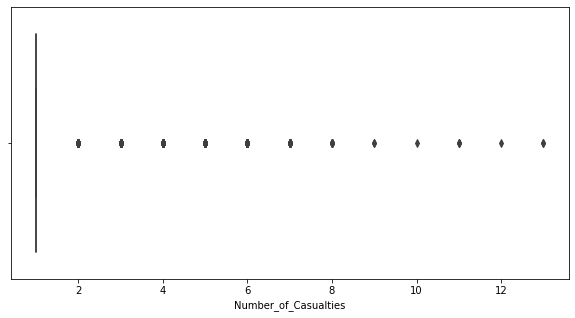

In [399]:
#Plotting box plot too see number of ouliers in our single continious variable
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(x=train_data['Number_of_Casualties'])

#### we can see above in box plot there are some outliers that we have to deal with so basically by calculating through IQR approach all the values which are greater than 1 are outliers in our data.

In [400]:
#Here we are removing outliers values which are greater than 1 from our training and testing data.
train_data.drop(train_data[train_data['Number_of_Casualties'] > 1].index, inplace = True)
test_data.drop(test_data[test_data['Number_of_Casualties'] > 1].index, inplace = True)

<AxesSubplot:xlabel='Number_of_Casualties'>

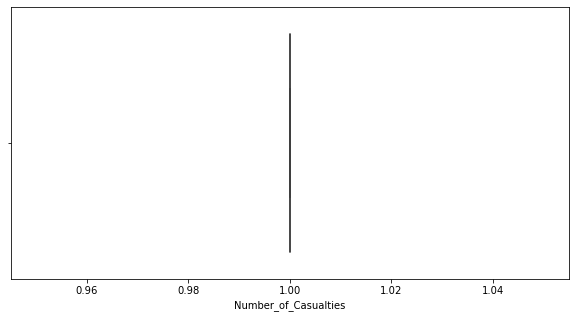

In [401]:
#Now we can see there are no outliers in our training data.
plt.figure(figsize=(10,5))
sns.boxplot(x=train_data['Number_of_Casualties'])

<AxesSubplot:xlabel='Number_of_Casualties'>

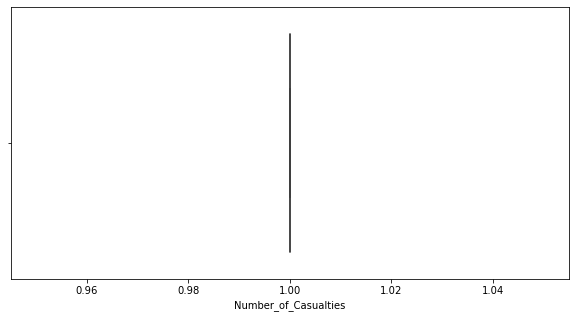

In [402]:
#Now we can see there are no outliers in our testing data.
plt.figure(figsize=(10,5))
sns.boxplot(x=test_data['Number_of_Casualties'])

## 3.Visualisation on Training Data

<AxesSubplot:xlabel='Accident_Severity', ylabel='Count'>

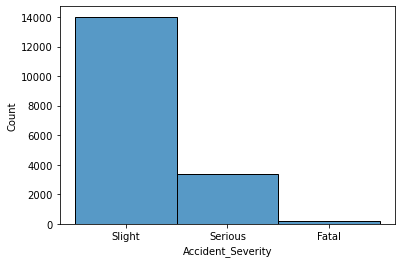

In [403]:
#Plotting Histogram on our target variable.
sns.histplot(data=train_data, x="Accident_Severity")

#### By looking at the above graph we can conclude that "Fatal" accident are very less which is a very good thing and "slight" are the most.

<AxesSubplot:xlabel='Day_of_Week', ylabel='Count'>

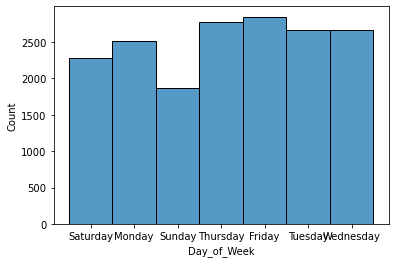

In [404]:
#Plotting Histogram for column "Day_of_Week".
sns.histplot(data=train_data, x="Day_of_Week")

#### By looking at the we can see that on Fridays there are the most number of accidents followed by thursday and on sunday there are least number of cases as people may be chiiling with there families on weekends.

<AxesSubplot:xlabel='Road_Surface_Conditions', ylabel='Count'>

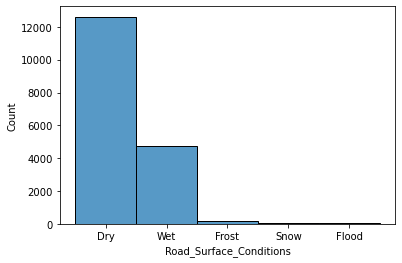

In [405]:
#Plotting Histogram for column "Road_Surface_Conditions".
sns.histplot(data=train_data, x="Road_Surface_Conditions")

#### Most of the accidents happened were on Dry Road surface 

<AxesSubplot:xlabel='Accident_Severity', ylabel='count'>

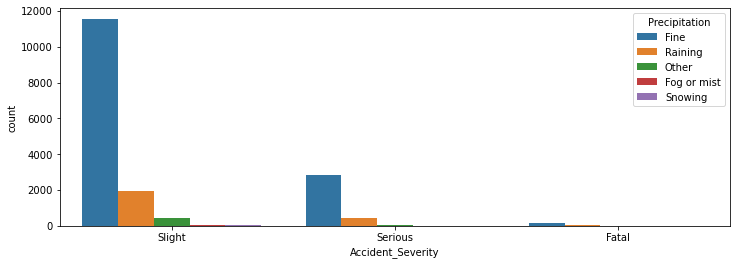

In [406]:
#Plooting a countplot on accident_severity with Precipitaion column
plt.figure(figsize=(12,4))
sns.countplot(x='Accident_Severity',data=train_data,hue='Precipitation')

#### By looking at the above graph we conclude that most of the accident of "slight" severity happened in Fine weather condition followed by Rainy weather.

<AxesSubplot:xlabel='Road_Surface_Conditions', ylabel='count'>

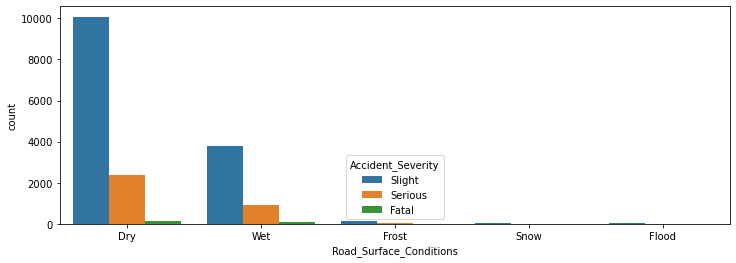

In [407]:
#Plotting Bar graph of accident severity with Road_Surface_Conditions.
plt.figure(figsize=(12,4))
sns.countplot(x='Road_Surface_Conditions',data=train_data,hue='Accident_Severity')

#### By looking at the above graph it shows that Most of the accident with all severities happened on Dry Road Surface followed by wet surface and flood being the least.

<AxesSubplot:xlabel='Light_Conditions', ylabel='count'>

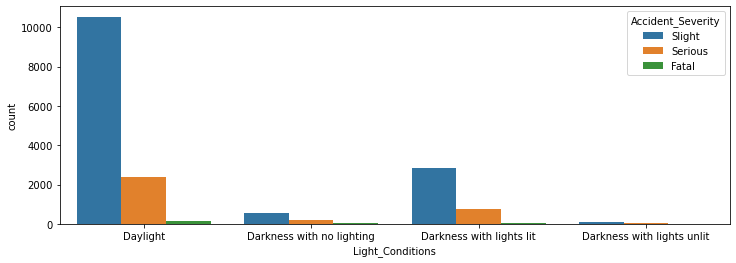

In [408]:
#Plotting Bar graph of accident severity with Light_Conditions.
plt.figure(figsize=(12,4))
sns.countplot(x='Light_Conditions',data=train_data,hue='Accident_Severity')

#### By looking at the above bar graph its clear that most of the accident with slight, serious, and Fatal severity were happened in Dayligh conditions followed by Darkness with lights on.

    Time   VISIBILITY  Number_of_Casualties
0    Day  Not Visible                   529
1    Day      Visible                 12805
2  Night  Not Visible                   836
3  Night      Visible                  3437


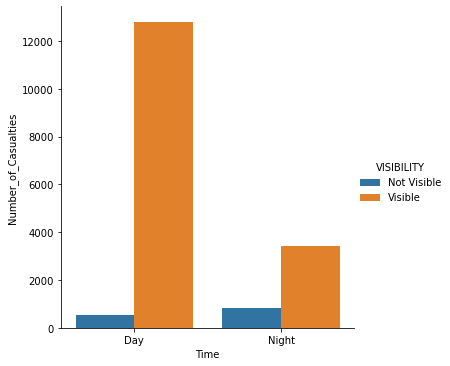

In [409]:
#First we group the data with columns "Time" and "VISIBILITY" and summing the "Number_of_Casualties"
#Then we are plotting Bar graph on this information.
bar = train_data.groupby(['Time', 'VISIBILITY']).sum()['Number_of_Casualties'].to_frame().reset_index()
print(bar)
sns.catplot(x="Time", y="Number_of_Casualties", hue="VISIBILITY", kind="bar", data=bar);

#### By looking at the above bar graph we conclude that more than 50k accidents were happened at Day Time with Visible condition, and more than 14k accidents wrere happened at Night Time but with Visibility ON, and more than 3k accidents happened at night Time with No visibility.

In [410]:
counts = train_data.groupby(train_data["Date"]).count()['Number_of_Casualties']
counts

Date
2019-01-01    37
2019-01-02    31
2019-01-03    28
2019-01-04    35
2019-01-05    38
              ..
2019-12-27    32
2019-12-28    26
2019-12-29    29
2019-12-30    29
2019-12-31    32
Name: Number_of_Casualties, Length: 365, dtype: int64

<AxesSubplot:xlabel='Date'>

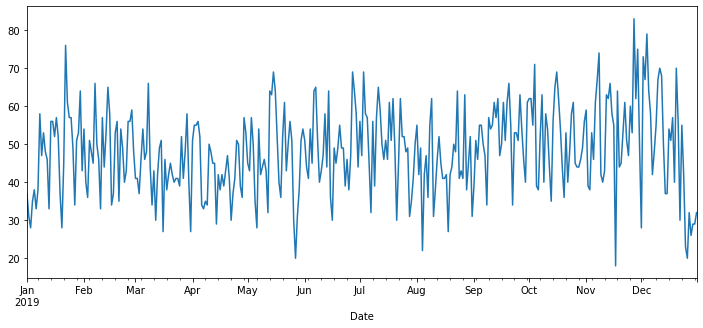

In [411]:
# plot it, use a wider figure
counts.plot(figsize=(12, 5))

#### As we can see from above graph most of the accidents happended in the month of december, one of the main reason is due to christmas people would have been moving here and there to celebrate christmas with their loved ones and offcourse for christmas shopping there would have been more traffic.

  Urban_or_Rural_Area  Number_of_Casualties
0               Rural                  5041
1               Urban                 12566


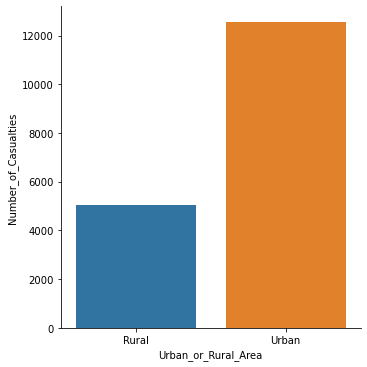

In [412]:
#First we group the data with columns "Urban_or_Rural_Area" and summing the "Number_of_Casualties"
#Then we are plotting Bar graph on this information.
box = train_data.groupby(['Urban_or_Rural_Area']).sum()['Number_of_Casualties'].to_frame().reset_index()
print(box)
sns.catplot(x="Urban_or_Rural_Area", y="Number_of_Casualties", kind="bar", data=box);

#### From this graph we conclude that number of accidents happened in urban areas are more as compare to rural areas, reason is that there is less traffic in rural areas and so the population that why urban having more accidents as compare to rural areas.

In [413]:
train_data.head()

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
418,Slight,1,2019-09-14,Saturday,Day,Newcastle-under-Lyme,Daylight,Fine,Dry,Urban,September,Visible,No High Winds,Dry
8116,Slight,1,2019-02-02,Saturday,Day,South Ribble,Daylight,Fine,Dry,Rural,February,Visible,No High Winds,Dry
21270,Slight,1,2019-01-28,Monday,Night,West Berkshire,Darkness with no lighting,Fine,Dry,Rural,January,Not Visible,No High Winds,Dry
20230,Serious,1,2019-03-24,Sunday,Day,Rochdale,Daylight,Fine,Dry,Rural,March,Visible,No High Winds,Dry
23655,Slight,1,2019-02-07,Thursday,Day,Southampton,Daylight,Fine,Dry,Urban,February,Visible,No High Winds,Dry


## 4.Dealing with Missing values.

In [414]:
#Checking missing values in training data.
train_data.isna().sum()

Accident_Severity             0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          0
Local_Authority_(District)    0
Light_Conditions              0
Precipitation                 0
Road_Surface_Conditions       0
Urban_or_Rural_Area           0
Month                         0
VISIBILITY                    0
High_winds                    0
Road_Surface_dry_or_wet       0
dtype: int64

#### As we have already deal with missing values earlier so there is no missing or null values in our training data.

In [415]:
#Checking missing values in testing data.
test_data.isna().sum()

Accident_Severity             0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          0
Local_Authority_(District)    0
Light_Conditions              0
Precipitation                 0
Road_Surface_Conditions       0
Urban_or_Rural_Area           0
Month                         0
VISIBILITY                    0
High_winds                    0
Road_Surface_dry_or_wet       0
dtype: int64

#### As we have already deal with missing values earlier so there is no missing or null values in our testing data.

In [416]:
#Sorting indexes
train_data = train_data.sort_index()
train_data.head(5)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
2,Slight,1,2019-12-10,Tuesday,Day,Ealing,Daylight,Fog or mist,Wet,Urban,December,Visible,No High Winds,Wet
3,Slight,1,2019-05-05,Sunday,Day,Cherwell,Daylight,Fine,Dry,Rural,May,Visible,No High Winds,Dry
4,Slight,1,2019-06-11,Tuesday,Day,Carmarthenshire,Daylight,Raining,Wet,Urban,June,Visible,No High Winds,Wet
7,Slight,1,2019-04-29,Monday,Day,Birmingham,Daylight,Fine,Dry,Urban,April,Visible,No High Winds,Dry
8,Slight,1,2019-08-27,Tuesday,Day,Camden,Daylight,Fine,Dry,Urban,August,Visible,No High Winds,Dry


In [417]:
#Sorting indexes
test_data = test_data.sort_index()
test_data.head(5)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,Month,VISIBILITY,High_winds,Road_Surface_dry_or_wet
1,Slight,1,2019-04-02,Tuesday,Day,North Lanarkshire,Daylight,Snowing,Snow,Rural,April,Visible,No High Winds,Wet
5,Slight,1,2019-08-07,Wednesday,Day,Bexley,Daylight,Fine,Dry,Urban,August,Visible,No High Winds,Dry
6,Serious,1,2019-09-16,Monday,Night,Hounslow,Daylight,Fine,Dry,Urban,September,Visible,No High Winds,Dry
12,Slight,1,2019-01-22,Tuesday,Day,Lewisham,Daylight,Fine,Wet,Urban,January,Not Visible,No High Winds,Wet
13,Slight,1,2019-04-28,Sunday,Day,Wyre,Daylight,Fine,Dry,Rural,April,Visible,No High Winds,Dry


In [418]:
train_data.shape

(17607, 14)

In [419]:
test_data.shape

(5826, 14)

# Creating Dummy variables

## 1. Creating Dummy Variables for Training Data

In [420]:
#Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [421]:
#Creating binary dummy variables for all categorical predictor variables.
one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
#Creating a column which include all categorical variables
column_name = ("Day_of_Week","Time","Light_Conditions","Precipitation","VISIBILITY","High_winds", \
               "Month","Urban_or_Rural_Area","Road_Surface_Conditions","Road_Surface_dry_or_wet")
for col in column_name:
    cat_vals = train_data[col].values.reshape(-1,1)

    transformed = one_hot_encoder.fit_transform(cat_vals)
    col_names = one_hot_encoder.categories_[0].tolist()[1:]
    for i, col_name in enumerate(col_names):
        train_data[col_name] = transformed[:,i]
        
train_data.head()

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,...,March,May,November,October,September,Urban,Flood,Frost,Snow,Wet
2,Slight,1,2019-12-10,Tuesday,Day,Ealing,Daylight,Fog or mist,Wet,Urban,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Slight,1,2019-05-05,Sunday,Day,Cherwell,Daylight,Fine,Dry,Rural,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Slight,1,2019-06-11,Tuesday,Day,Carmarthenshire,Daylight,Raining,Wet,Urban,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,Slight,1,2019-04-29,Monday,Day,Birmingham,Daylight,Fine,Dry,Urban,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Slight,1,2019-08-27,Tuesday,Day,Camden,Daylight,Fine,Dry,Urban,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [422]:
# Deleting the old variables after creating dummy of the same
train_data_final = train_data.drop(["Date","Local_Authority_(District)","Day_of_Week","Time","Light_Conditions","Precipitation","VISIBILITY","High_winds", \
               "Month","Urban_or_Rural_Area","Road_Surface_Conditions","Road_Surface_dry_or_wet"],axis=1)

In [423]:
#Displaying the results after creating dummy variables.
train_data_final.head(2)

,Accident_Severity,Number_of_Casualties,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Night,Darkness with lights unlit,...,March,May,November,October,September,Urban,Flood,Frost,Snow,Wet
2,Slight,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Slight,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Creating Dummy Variables for Test Data

In [424]:
#Creating binary dummy variables for all categorical predictor variables.
one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
#Creating a column which include all categorical variables
column_name = ("Day_of_Week","Time","Light_Conditions","Precipitation","VISIBILITY","High_winds", \
               "Month","Urban_or_Rural_Area","Road_Surface_Conditions","Road_Surface_dry_or_wet")
for col in column_name:
    cat_vals = test_data[col].values.reshape(-1,1)

    transformed = one_hot_encoder.fit_transform(cat_vals)
    col_names = one_hot_encoder.categories_[0].tolist()[1:]
    for i, col_name in enumerate(col_names):
        test_data[col_name] = transformed[:,i]
        
test_data.head()

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Precipitation,Road_Surface_Conditions,Urban_or_Rural_Area,...,March,May,November,October,September,Urban,Flood,Frost,Snow,Wet
1,Slight,1,2019-04-02,Tuesday,Day,North Lanarkshire,Daylight,Snowing,Snow,Rural,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,Slight,1,2019-08-07,Wednesday,Day,Bexley,Daylight,Fine,Dry,Urban,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,Serious,1,2019-09-16,Monday,Night,Hounslow,Daylight,Fine,Dry,Urban,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
12,Slight,1,2019-01-22,Tuesday,Day,Lewisham,Daylight,Fine,Wet,Urban,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13,Slight,1,2019-04-28,Sunday,Day,Wyre,Daylight,Fine,Dry,Rural,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [425]:
# Deleting the old variables after creating dummy of the same
test_data_final = test_data.drop(["Date","Local_Authority_(District)","Day_of_Week","Time","Light_Conditions","Precipitation","VISIBILITY","High_winds", \
               "Month","Urban_or_Rural_Area","Road_Surface_Conditions","Road_Surface_dry_or_wet"],axis=1)

In [426]:
#Displaying the data with dummy variables
test_data_final.head(2)

,Accident_Severity,Number_of_Casualties,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Night,Darkness with lights unlit,...,March,May,November,October,September,Urban,Flood,Frost,Snow,Wet
1,Slight,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,Slight,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 3.Feature scaling

Our dataset only contain categotical data so there is no need for feature scaling. Feature scaling is beneficial for continious Data.

## Final Datasets Dimensionality
1. Training Data- 17607(Records)
2. Testing Data - 5826(Records)

In [427]:
train_data_final.shape

(17607, 34)

In [428]:
test_data_final.shape

(5826, 34)

### Loading the Final datasets to CSV files

In [431]:
train_data_final.to_csv("train.csv")

In [432]:
test_data_final.to_csv("test.csv")